In [1]:
import pandas as pd

data = pd.read_csv("../../data/hotel_bookings.csv")


# Limpiar DB y mantener puros numeros

In [2]:
dict_dtypes = dict(data.dtypes)
columns2drop = []

for dtype in dict_dtypes:
    column_type = dict_dtypes[dtype]
    if column_type == "object":
        columns2drop.append(dtype)

clean_data = data.drop(columns2drop, 1)

columns2drop = []
for column in clean_data.columns:
    column_data = clean_data[column]
    isna_cd = column_data.isna()
    if isna_cd.describe()["top"]:
        columns2drop.append(column)
    else:
        clean_data[column] = clean_data[column].fillna(0)

clean_data = clean_data.drop(columns2drop, 1)


In [3]:
# y es mi columna binaria
# x es mi grupo de las columnas sin y
n_rows = 100
y = clean_data.iloc[:,0]
display(y.head())
x = clean_data.iloc[:, 1:]
display(x.head())


0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0,0.0,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0,0.0,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0,75.0,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


# Procesar los datos

In [4]:
from sklearn.model_selection import KFold  # Iteraciones
from sklearn.model_selection import cross_val_score  # Metodo de validación
from sklearn.linear_model import LogisticRegression  # Modelo matemático

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)
"""
solver: Metodo de penalización
"""
model = LogisticRegression(solver="lbfgs", max_iter=3000)
results = cross_val_score(model, x, y, cv=kfold)
mean_p = results.mean()*100.0
std_p = results.std()*100.0
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}%")


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)


In [ ]:
from sklearn.model_selection import KFold  # Iteraciones
from sklearn.model_selection import cross_val_score  # Metodo de validación
from sklearn.linear_model import LogisticRegression  # Modelo matemático

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)
"""
solver: Metodo de penalización
"""
model = LogisticRegression(solver="lbfgs", max_iter=1000)
results = cross_val_score(model, x_scaled, y, cv=kfold)
mean_p = results.mean()*100.0
std_p = results.std()*100.0
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}%")


Accuracy: 72.00% 17.78%


In [ ]:
from sklearn.model_selection import train_test_split  # División por porcentaje
from sklearn.linear_model import LogisticRegression

test_size = .33
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_size)
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
mean_p = results.mean()*100.0
std_p = results.std()*100.0
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}%")


Accuracy: 84.85% 0.00%


<ipython-input-96-ba75a0d7a1d0>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x.hist(ax=ax)


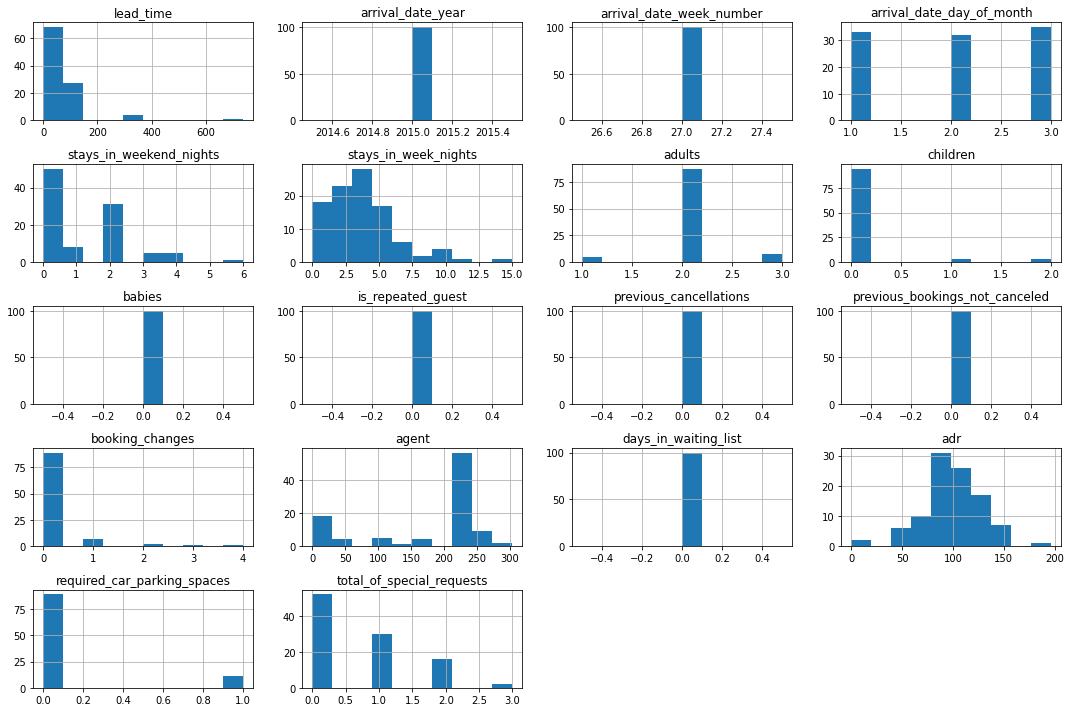

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
x.hist(ax=ax)
fig.tight_layout()
plt.show()
